<a href="https://colab.research.google.com/github/Harish-topper12/Deep_Learning_Assignment/blob/main/CNN_Deep_Learning_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pl
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout

from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [ ]:
print(tf.__version__)
print(keras.__version__)

2.14.0
2.14.0


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print("Train Data Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Data Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Data Shape: (50000, 32, 32, 3)
Train Labels Shape: (50000, 1)
Test Data Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)


In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

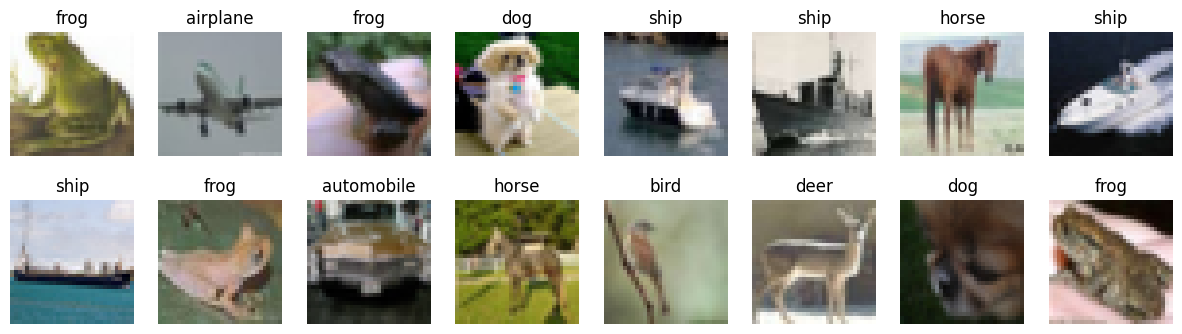

In [ ]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

#### One - Hot Encoding on target values

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train = x_train.astype('float32')
x_train = x_train/255.0

x_test = x_test.astype('float32')
x_test = x_test/255.0

In [ ]:
import matplotlib.pyplot as pyplot

def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.xlabel('Epochs')
    pyplot.ylabel('Loss')
    pyplot.legend(loc='upper right')

    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.xlabel('Epochs')
    pyplot.ylabel('Accuracy')
    pyplot.legend(loc='upper left')

    pyplot.tight_layout()


In [ ]:

def alexnet_cifar10(input_shape=(32, 32, 3)):
    model = tf.keras.models.Sequential([
        # 1st Conv Layer
        tf.keras.layers.Conv2D(96, (5,5), strides=(1,1), activation='elu', input_shape=input_shape, padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.BatchNormalization(),

        # 2nd Conv Layer
        tf.keras.layers.Conv2D(256, (3,3), activation='elu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.BatchNormalization(),

        # 3rd Conv Layer
        tf.keras.layers.Conv2D(384, (3,3), activation='elu', padding='same'),
        tf.keras.layers.BatchNormalization(),

        # 4th Conv Layer
        tf.keras.layers.Conv2D(384, (3,3), activation='elu', padding='same'),
        tf.keras.layers.BatchNormalization(),

        # 5th Conv Layer
        tf.keras.layers.Conv2D(256, (3,3), activation='elu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.BatchNormalization(),

        # Flattening
        tf.keras.layers.Flatten(),

        # 1st Dense Layer
        tf.keras.layers.Dense(4096, activation='elu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),

        # 2nd Dense Layer
        tf.keras.layers.Dense(4096, activation='elu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),

        # Output Layer
        tf.keras.layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
    ])

    return model



alexnet_cifar10_model = alexnet_cifar10()
optimizer = SGD(learning_rate=0.001)
alexnet_cifar10_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Enhanced Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.,
    zoom_range=0.,
    vertical_flip=False,
    fill_mode='nearest',
    cval=0.,
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None
)



# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=32)

# Compute steps based on batch size
steps = int(x_train.shape[0] / 32)

# Early stopping for preventing overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Training the model with the enhanced data augmentation
alexnet_history = alexnet_cifar10_model.fit(it_train, steps_per_epoch=steps, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])




Epoch 1/50
1562/1562 [==============================] - 44s 20ms/step - loss: 1.8887 - accuracy: 0.3875 - val_loss: 1.3545 - val_accuracy: 0.5416
Epoch 2/50
1562/1562 [==============================] - 30s 20ms/step - loss: 1.5229 - accuracy: 0.4969 - val_loss: 1.2229 - val_accuracy: 0.5909
Epoch 3/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.3494 - accuracy: 0.5499 - val_loss: 1.2035 - val_accuracy: 0.5949
Epoch 4/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2374 - accuracy: 0.5849 - val_loss: 1.2376 - val_accuracy: 0.6115
Epoch 5/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.1446 - accuracy: 0.6151 - val_loss: 1.5992 - val_accuracy: 0.5499
Epoch 6/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0751 - accuracy: 0.6340 - val_loss: 1.0277 - val_accuracy: 0.6510
Epoch 7/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0192 - accuracy: 0.6519 - val_loss: 0.9372 -

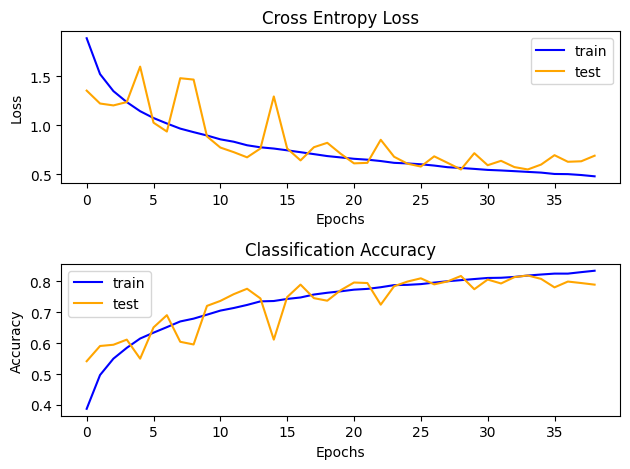

In [ ]:
summarize_diagnostics(alexnet_history)

In [ ]:
alexnet_train_loss, alexnet_train_accuracy = alexnet_cifar10_model.evaluate(x_train, y_train, verbose = 0)
alexnet_train_accuracy

0.8350600004196167

In [ ]:
alexnet_test_loss, alexnet_test_accuracy = alexnet_cifar10_model.evaluate(x_test, y_test, verbose = 0)
alexnet_test_accuracy

0.7894999980926514

In [ ]:
from keras.datasets import cifar10
import numpy as np

def top3_class_accuracies(model,x_test = x_test, test_labels = y_test):
    # Load CIFAR-10 data

    test_labels = np.argmax(test_labels, axis=1)

    test_labels = test_labels.squeeze()  # Remove single-dimensional entries



    # Get model predictions for the test set
    predicted_classes = np.argmax(model.predict(x_test), axis=1)

    # CIFAR-10 class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Calculate accuracy for each class
    class_accuracies = {}
    for i, class_name in enumerate(class_names):
        correct_predictions = np.sum((test_labels == i) & (predicted_classes == i))
        total = np.sum(test_labels == i)
        class_accuracies[class_name] = correct_predictions / total

    # Sort and select top 3 classes
    sorted_accuracies = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=True)[:3]

    return sorted_accuracies


# top3_accuracies = top3_class_accuracies(trained_model)
# for class_name, accuracy in top3_accuracies:
#     print(f"Accuracy for {class_name}: {accuracy * 100:.2f}%")


In [ ]:
def plot_top3_accuracies(model,arch_name):
    # Get top 3 class accuracies
    top3_accuracies = top3_class_accuracies(model,x_test = x_test, test_labels = y_test)

    print(top3_accuracies)

    # Extract class names and their accuracies for plotting
    classes, accuracies = zip(*top3_accuracies)

    # Plotting the results
    bars = plt.bar(classes, accuracies, color=['blue', 'green', 'red'])
    plt.xlabel('Classes')
    plt.ylabel('Accuracy')
    plt.title(f'Top 3 Class Accuracies for {arch_name} ')
    plt.ylim(0, 1)
    plt.tight_layout()



    plt.show()

313/313 [==============================] - 2s 4ms/step
[('frog', 0.97), ('automobile', 0.916), ('truck', 0.897)]


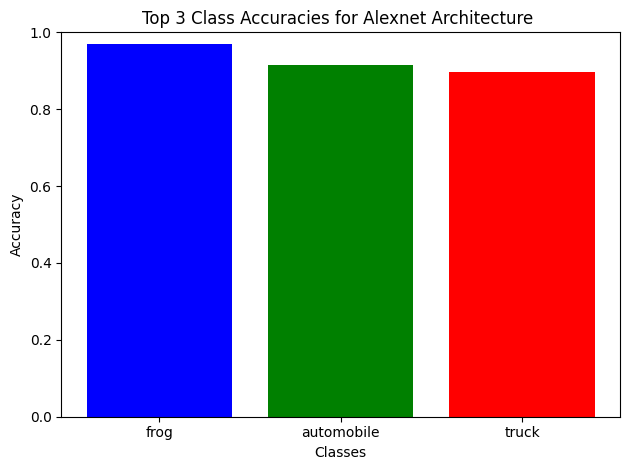

In [ ]:
plot_top3_accuracies(alexnet_cifar10_model, arch_name = "Alexnet Architecture")

In [ ]:
def vgg_cifar10():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())




    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())




    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())



    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())


    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4096, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes


    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model



In [ ]:
vgg_cifar10_model = vgg_cifar10()
optimizer = Adam(learning_rate=0.001)
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=32)
# fit model
steps = int(x_train.shape[0] / 32)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


vgg_history = vgg_cifar10_model.fit(it_train, steps_per_epoch=steps, epochs=50, validation_data=(x_test, y_test), callbacks = [early_stopping])

In [ ]:
summarize_diagnostics(vgg_history)

In [ ]:
vgg_train_accuracy = vgg_cifar10_model.evaluate(x_train, y_train)
vgg_train_accuracy

In [ ]:
vgg_test_accuracy = vgg_cifar10_model.evaluate(x_test, y_test)
vgg_test_accuracy

In [ ]:
plot_top3_accuracies(vgg_cifar10_model, arch_name = "VGG Architecture")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

def lenet_cifar10():
    model = Sequential()

    # Layer 1: Convolutional Layer - 28x28x6
    model.add(Conv2D(6, (5, 5), activation='tanh', padding='valid', input_shape=(32, 32, 3)))

    # Layer 2: Convolutional Layer - 14x14x6
    model.add(Conv2D(6, (3, 3), strides=(2,2), activation='tanh', padding='same'))

    # Layer 3: Convolutional Layer - 10x10x16
    model.add(Conv2D(16, (5, 5), activation='tanh', padding='valid'))

    # Layer 4: Convolutional Layer - 5x5x16
    model.add(Conv2D(16, (3, 3), strides=(2,2), activation='tanh', padding='same'))

    # Layer 5: Convolutional Layer (acts like a fully connected layer) - 1x1x120
    model.add(Conv2D(120, (5, 5), activation='tanh', padding='valid'))

    # Flatten the network
    model.add(Flatten())

    # Layer 6: Fully Connected Layer (Dense) - 84 units
    model.add(Dense(84, activation='tanh'))

    # Layer 7: Output Layer - 10 units
    model.add(Dense(10, activation='softmax'))

    # Create an instance of the SGD optimizer with learning rate of 0.001
    optimizer = SGD(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Print a summary of the model architecture
lenet_cifar10_model = lenet_cifar10()


lenet_cifar10_model.summary()


In [ ]:

# Enhanced Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.,
    zoom_range=0.,
    vertical_flip=False,
    fill_mode='nearest',
    cval=0.,
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    data_format=None
)

# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)

# Compute steps based on batch size
steps = int(x_train.shape[0] / 64)

# Early stopping for preventing overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Training the model with the enhanced data augmentation
lenet_cifar10_history = lenet_cifar10_model.fit(it_train, steps_per_epoch=steps, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Plotting diagnostics (assuming you've defined the function)
summarize_diagnostics(lenet_cifar10_history)


In [ ]:
lenet_train_accuracy = lenet_cifar10_model.evaluate(x_train, y_train)
lenet_train_accuracy

In [ ]:
lenet_test_accuracy = lenet_cifar10_model.evaluate(x_test, y_test)
lenet_test_accuracy

In [ ]:
plot_top3_accuracies(lenet_cifar10_model, arch_name = "Lenet Architecture")

In [ ]:
# Comparison of Three Architectures
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracies_comparison(architectures, train_accuracies, test_accuracies):
    barWidth = 0.3
    r1 = np.arange(len(train_accuracies))
    r2 = [x + barWidth for x in r1]

    # Create train accuracy bars
    plt.bar(r1, train_accuracies, width=barWidth, color='blue', edgecolor='grey', label='train')

    # Create test accuracy bars
    plt.bar(r2, test_accuracies, width=barWidth, color='red', edgecolor='grey', label='test')

    # Title & Subtitle
    plt.title('Comparison of Architectures')

    # X axis
    plt.xlabel('Architectures', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(train_accuracies))], architectures)

    # Y axis
    plt.ylabel('Accuracy')

    # Add the accuracy values on top of the bars
    for i in range(len(r1)):
        plt.text(r1[i], train_accuracies[i] + 0.02, round(train_accuracies[i], 2), ha='center', va='bottom')
        plt.text(r2[i], test_accuracies[i] + 0.02, round(test_accuracies[i], 2), ha='center', va='bottom')

    # Create legend & Show graphic
    plt.legend()
    plt.show()


In [ ]:
architectures = ["Lenet Architecture", "AlexNet Architecture", "VGG Architecture"]
train_accuracies = [lenet_train_accuracy, alexnet_train_accuracy, vgg_train_accuracy]
test_accuracies = [lenet_test_accuracy, alexnet_test_accuracy, vgg_test_accuracy]

plot_accuracies_comparison(architectures, train_accuracies, test_accuracies)